# Step 1: Read Data
In this step, I dropped the unused columns, and set the 'projectid' as index.

In [2]:
import pipeline as pl
import classifiers as clf
from sklearn import metrics
import pandas as pd

In [3]:
cols_to_drop = ['teacher_prefix', 'teacher_acctid', 'schoolid', 'school_ncesid',\
                'school_latitude', 'school_longitude', 'school_city', 'school_state',\
                'school_district', 'school_county']
df = pl.read_data('../data/projects_2012_2013.csv', cols_to_drop)
df.head()

,school_metro,school_charter,school_magnet,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
projectid,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,urban,f,f,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
0000fa3aa8f6649abab23615b546016d,urban,f,f,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
000134f07d4b30140d63262c871748ff,urban,f,f,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
0001f2d0b3827bba67cdbeaa248b832d,urban,f,t,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
0004536db996ba697ca72c9e058bfe69,suburban,f,f,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


In [4]:
df.dtypes

school_metro                               object
school_charter                             object
school_magnet                              object
primary_focus_subject                      object
primary_focus_area                         object
secondary_focus_subject                    object
secondary_focus_area                       object
resource_type                              object
poverty_level                              object
grade_level                                object
total_price_including_optional_support    float64
students_reached                          float64
eligible_double_your_impact_match          object
date_posted                                object
datefullyfunded                            object
dtype: object

# Step 2: Explore Data
The exploration of data is divided into four parts:
- summary of continuous variables
- summary of categorical variables
- histographs of variables
- graph of correlation between variables

In [4]:
continuous_vars = ['total_price_including_optional_support', 'students_reached']
categorical_vars = ['school_metro', 'school_charter', 'school_magnet',\
                    'primary_focus_subject', 'primary_focus_area',\
                    'secondary_focus_subject', 'secondary_focus_area',\
                    'resource_type', 'poverty_level', 'grade_level',\
                    'eligible_double_your_impact_match']

In [5]:
pl.summary_continuous_vars(df, continuous_vars)

,total_price_including_optional_support,students_reached
count,124976.000000,124917.000000
mean,654.011811,95.445760
std,1098.015854,163.481912
min,92.000000,1.000000
25%,345.810000,23.000000
50%,510.500000,30.000000
75%,752.960000,100.000000
max,164382.840000,12143.000000


The table above shows the decriptive statistics of the continuous variables including the amount, mean, stand deviation and so on.

In [6]:
for cat in categorical_vars:
    print(pl.summary_categorical_vars(df, cat))

      count  school_metro
0     urban         62267
1  suburban         33084
2     rural         14401
  count  school_charter
0     f          113340
1     t           11636
  count  school_magnet
0     f         114273
1     t          10703
                    count  primary_focus_subject
0                Literacy                  37408
1             Mathematics                  16859
2    Literature & Writing                  16141
3           Special Needs                   8348
4             Visual Arts                   5870
5        Applied Sciences                   5825
6   Environmental Science                   4835
7   Health & Life Science                   4185
8                   Music                   3931
9     History & Geography                   2701
10      Early Development                   2618
11    Character Education                   2249
12                  Other                   1809
13        Performing Arts                   1682
14                  

From the table above, we can find the decriptive statistics of categorical variables.

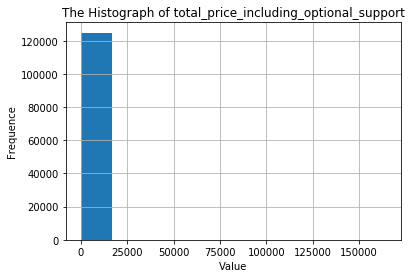

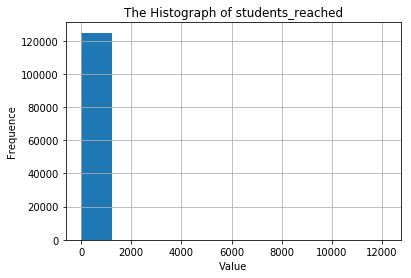

In [10]:
pl.generate_graph(df, continuous_vars)

From the histographs above, we can find that the distributions of the two continuous varibables are highly unbalanced-most values of these variables are concentrated on the left side.

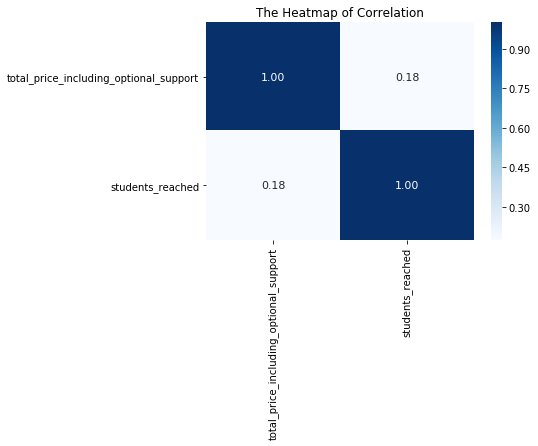

In [11]:
pl.generate_corr_graph(df)

From the table illustrating the relationships between variables of interest, we can find that the correlation between ```students_reached``` and ```total_price_including_optional_support``` is weak.

In [7]:
outliers = pl.count_outliers(df, continuous_vars)
outliers

,total_price_including_optional_support,students_reached
0,718,3790


In [8]:
outliers.sum().mean()

2254.0

There are a lot of outliers in both continuous variables, which might lead to the unbalanced distribution like the histograph shows.

# Step 3: Pre-Process Data
In this step, I replaced the missing values with median.

In [9]:
# Before replacement
df.isnull().sum()

school_metro                              15224
school_charter                                0
school_magnet                                 0
primary_focus_subject                        15
primary_focus_area                           15
secondary_focus_subject                   40556
secondary_focus_area                      40556
resource_type                                17
poverty_level                                 0
grade_level                                   3
total_price_including_optional_support        0
students_reached                             59
eligible_double_your_impact_match             0
date_posted                                   0
datefullyfunded                               0
dtype: int64

In [10]:
cat_vars_with_nan = ['school_metro', 'primary_focus_subject', 'primary_focus_area',\
                     'secondary_focus_subject', 'secondary_focus_area', 'resource_type',\
                     'grade_level']
contin_vars_with_nan = ['students_reached']

In [11]:
# After replacement
for cat in cat_vars_with_nan:
    pl.fill_missing(df, cat, 'categorical', 'Unknonw')
for ct in contin_vars_with_nan:
    pl.fill_missing(df, ct, 'continuous')
df.isnull().sum()

school_metro                              0
school_charter                            0
school_magnet                             0
primary_focus_subject                     0
primary_focus_area                        0
secondary_focus_subject                   0
secondary_focus_area                      0
resource_type                             0
poverty_level                             0
grade_level                               0
total_price_including_optional_support    0
students_reached                          0
eligible_double_your_impact_match         0
date_posted                               0
datefullyfunded                           0
dtype: int64

# Step 4: Generate Features
In this step, I converted the continuous variables ```total_price_including_optional_supportage``` and ```students_reached``` to categorical variables. Meanwhile, I created dummy variables for projects that got fully funded within 60 days.

In [12]:
# discretize 'total_price_including_optional_support' and 'students_reached'
for var in continuous_vars:
    labels_var = ['low', 'mediate', 'high']
    min_var = df[var].min()
    max_var = df[var].max()
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    bins_var = [min_var, q1, q3, max_var]
    df = pl.discretize_continuous_var(df, var, bins_var, labels_var)

In [13]:
# creat dummy variables for projects that got fully funded within 60 days.
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])
df['days'] = (df['datefullyfunded'] - df['date_posted']).dt.days
df['60daysfunded'] = [1 if x <= 60 else 0 for x in df['days']]

In [14]:
# create dummy variables
cats = df.columns.difference(['total_price_including_optional_support', 'students_reached',\
                                    'date_posted', 'datefullyfunded', 'days', '60daysfunded'])
df = pl.create_binary_var(df, cats)
df.head()

,total_price_including_optional_support,students_reached,date_posted,datefullyfunded,days,60daysfunded,discretized_students_reached_low,discretized_students_reached_mediate,discretized_students_reached_high,discretized_total_price_including_optional_support_low,...,secondary_focus_subject_Music,secondary_focus_subject_Nutrition,secondary_focus_subject_Other,secondary_focus_subject_Parent Involvement,secondary_focus_subject_Performing Arts,secondary_focus_subject_Social Sciences,secondary_focus_subject_Special Needs,secondary_focus_subject_Sports,secondary_focus_subject_Unknonw,secondary_focus_subject_Visual Arts
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,1498.61,31.0,2013-04-14,2013-05-02,18,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
0000fa3aa8f6649abab23615b546016d,282.47,28.0,2012-04-07,2012-04-18,11,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
000134f07d4b30140d63262c871748ff,1012.38,56.0,2012-01-30,2012-04-15,76,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
0001f2d0b3827bba67cdbeaa248b832d,175.33,23.0,2012-10-11,2012-12-05,55,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
0004536db996ba697ca72c9e058bfe69,3591.11,150.0,2013-01-08,2013-03-25,76,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Step 5: Experiment with Different Classifiers of Different Parameters
In this step, I choosed seven models (Logistic Regression, K-Nearest Neighbor, Decision Trees, SVM, Random Forests, Boosting, and Bagging) to build the classiers, then do experiments with different parameters for these classifiers.

According to the requirement of the Homework 3, the data spans Jan 1, 2012 to Dec 31, 2013, and the validation/test set should be a rolling window of 6 months (which should give you three test sets). Thus, we will have there time stamps:
- 2012-07-01
- 2013-01-01
- 2013-07-01

For the step of doing experiments with different classifiers, to be more efficient, I splited the data from 2012-01-01 to 2013-01-01 as training set, and the data after 2013-01-01 as testing data. Meanwhile, to be more efficient, I only use 5 best features in this step.

The temporal validation will be conducted in step 6.

In [15]:
predictors = df.columns.difference(['total_price_including_optional_support', 'students_reached',\
                                    'date_posted', 'datefullyfunded', 'days', '60daysfunded'])

In [16]:
train_data, test_data, train_target, test_target = \
                pl.temporal_validation(df, predictors, '60daysfunded', 'date_posted', '2013-01-01', '2013-07-01')

In [17]:
# number of features before feature selection
train_data.shape[1]

104

In [18]:
# number of features after feature selection
new_train_data = pl.select_feature(train_data, train_target, 20)
new_train_data.shape[1]

20

In [19]:
# select testing data with the same dimension as training data
new_test_data = test_data[new_train_data.columns]

In [114]:
# KNN with different parameters
for neigh in clf.GRID['KNN']['n_neighbors']:
    print()
    print('number of neighbors is {}'.format(neigh))
    for metric in clf.GRID['KNN']['metric']:
        print('metric is {}'.format(metric))
        for weight in clf.GRID['KNN']['weights']:
            print('weight is {}'.format(weight))
            knn = clf.build_knn(neigh, metric, weight)
            clf.trail_threshold(knn, new_train_data, train_target, new_test_data, test_target)


number of neighbors is 5
metric is euclidean
weight is uniform
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 63934, F1 is 0.82
(Threshold: 0.3), the total number of thepredicted is 63934, F1 is 0.82
(Threshold: 0.5), the total number of thepredicted is 54403, F1 is 0.78
weight is distance
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 63934, F1 is 0.82
(Threshold: 0.3), the total number of thepredic

(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65464, F1 is 0.83
(Threshold: 0.5), the total number of thepredicted is 57663, F1 is 0.80
metric is minkowski
weight is uniform
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65464, F1 is 0.83
(Threshold: 0.5), the total number of thepredicted is 57663, F1 is 0.80
weight is distance
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(

In [264]:
# Decision Tree with different parameters
for crt in clf.GRID['DT']['criterion']:
    print()
    print('criterion is {}'.format(crt))
    for depth in clf.GRID['DT']['max_depth']:
        print('max depth is {}'.format(depth))
        for leaf in clf.GRID['DT']['min_samples_leaf']:
            print('min samples leaf is {}'.format(leaf))
            dt = clf.build_dt(crt, depth, leaf)
            clf.trail_threshold(dt, new_train_data, train_target, new_test_data, test_target)


criterion is gini
max depth is 5
min samples leaf is 2
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.5), the total number of thepredicted is 65619, F1 is 0.83
min samples leaf is 10
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted 

(Threshold: 0.2), the total number of thepredicted is 65584, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65461, F1 is 0.83
(Threshold: 0.5), the total number of thepredicted is 61212, F1 is 0.82


In [255]:
# Logistic Regression with different parameters
for p in clf.GRID['LR']['penalty']:
    print()
    print('penalty is {}'.format(p))
    for c in clf.GRID['LR']['C']:
        print('C is {}'.format(c))
        lr = clf.build_lr(p, c)
        clf.trail_threshold(lr, new_train_data, train_target, new_test_data, test_target)


penalty is l1
C is 0.01
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.5), the total number of thepredicted is 65630, F1 is 0.83
C is 0.1
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.5), the to

In [265]:
# SVM with different parameters
for c in clf.GRID['SVM']['C']:
    print('C is {}'.format(c))
    svm = clf.build_svm(c)
    svm.fit(new_train_data, train_target)
    confidence_score = svm.decision_function(new_test_data)
    for threshold in clf.THRESHOLD:
        pred_label = [1 if x > threshold else 0 for x in confidence_score]
        print('(Threshold: {}), the total number of the predicted '
            'is {}, the accuracy is {:.2f}'.format(threshold,\
            sum(pred_label), metrics.f1_score(test_target, pred_label)))

C is 0.01
(Threshold: 0.01), the total number of the predicted is 64064, the accuracy is 0.83
(Threshold: 0.02), the total number of the predicted is 63923, the accuracy is 0.83
(Threshold: 0.05), the total number of the predicted is 62180, the accuracy is 0.82
(Threshold: 0.1), the total number of the predicted is 60102, the accuracy is 0.82
(Threshold: 0.2), the total number of the predicted is 52479, the accuracy is 0.79
(Threshold: 0.3), the total number of the predicted is 41811, the accuracy is 0.74
(Threshold: 0.5), the total number of the predicted is 21436, the accuracy is 0.54
C is 0.1
(Threshold: 0.01), the total number of the predicted is 64064, the accuracy is 0.83
(Threshold: 0.02), the total number of the predicted is 63540, the accuracy is 0.82
(Threshold: 0.05), the total number of the predicted is 62097, the accuracy is 0.82
(Threshold: 0.1), the total number of the predicted is 59405, the accuracy is 0.82
(Threshold: 0.2), the total number of the predicted is 52415, 

In [266]:
# Random Forest with different parameters
for n in clf.GRID['RF']['n_estimators']:
    print()
    print('number of estimators is {}'.format(n))
    for depth in clf.GRID['RF']['max_depth']:
        print('maximum depth is {}'.format(depth))
        rf = clf.build_rf(n, depth)
        clf.trail_threshold(rf, new_train_data, train_target, new_test_data, test_target)


number of estimators is 5
maximum depth is 5
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.5), the total number of thepredicted is 65627, F1 is 0.83
maximum depth is 20
(Threshold: 0.01), the total number of thepredicted is 65568, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65568, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65558, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65500, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65391, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65179, F1 

In [267]:
# Boosting with different parameters
for n in clf.GRID['AB']['n_estimators']:
    print()
    print('number of estimators is {}'.format(n))
    ab = clf.build_ab(n)
    clf.trail_threshold(ab, new_train_data, train_target, new_test_data, test_target)


number of estimators is 1
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.5), the total number of thepredicted is 65630, F1 is 0.83

number of estimators is 10
(Threshold: 0.01), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65630, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65630, F1 is 0.83
(Th

In [268]:
# Bagging with different parameters
for n in clf.GRID['BAG']['n_estimators']:
    print()
    print('number of estimators is {}'.format(n))
    for m in clf.GRID['BAG']['max_samples']:
        print('number of maximum samples is {}'.format(m))
        bag = clf.build_bag(n, m)
        clf.trail_threshold(bag, new_train_data, train_target, new_test_data, test_target)


number of estimators is 5
number of maximum samples is 0.3
(Threshold: 0.01), the total number of thepredicted is 65607, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65607, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65597, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65563, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65451, F1 is 0.83
(Threshold: 0.3), the total number of thepredicted is 65175, F1 is 0.83
(Threshold: 0.5), the total number of thepredicted is 60451, F1 is 0.81
number of maximum samples is 0.5
(Threshold: 0.01), the total number of thepredicted is 65593, F1 is 0.83
(Threshold: 0.02), the total number of thepredicted is 65593, F1 is 0.83
(Threshold: 0.05), the total number of thepredicted is 65568, F1 is 0.83
(Threshold: 0.1), the total number of thepredicted is 65538, F1 is 0.83
(Threshold: 0.2), the total number of thepredicted is 65368, F1 is 0.83
(Threshold: 0.3), the total number of

# Step 6: Select the Best Parameter Grid for Different Classifiers
In this step, I will select the best parameter grid for the seven models (Logistic Regression, K-Nearest Neighbor, Decision Trees, SVM, Random Forests, Boosting, and Bagging) to build the classiers.

In this step, I select 20 best features.

In [141]:
best_paras = {}
new_train_data = pl.select_feature(train_data, train_target, 20)
for name, model in clf.CLASSIFIERS.items():
    best_paras[name] = pl.select_best_grid(model, clf.GRID[name], new_train_data, train_target)

In [142]:
best_paras

{'LR': {'C': 10, 'penalty': 'l1'},
 'KNN': {'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'},
 'DT': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2},
 'SVM': {'C': 0.01},
 'RF': {'max_depth': 5, 'n_estimators': 5},
 'AB': {'n_estimators': 1},
 'BAG': {'max_samples': 0.5, 'n_estimators': 20}}

# Step 7: Evaluate Models with the Best Parameters by Tempora l Validation
In this step, I use three dataset separated by three timestamps (2012-07-01, 2013-01-01, 2013-07-01). In each set, find the best parameters and then evaluate each model with the best parameters on a basis of performance metrics (precision and recall at different thresholds 1%, 2%, 5%, 10%, 20%, 30%, 50% and AUC_ROC).

In [20]:
# First dataset is separated by the timestamp 2012-07-01.
train1, test1, train_target1, test_target1 = \
        pl.temporal_validation(df, predictors, '60daysfunded', 'date_posted', '2012-07-01', '2013-01-01')

In [21]:
# Second dataset is separated by the timestamp 2013-01-01.
train2, test2, train_target2, test_target2 = \
        pl.temporal_validation(df, predictors, '60daysfunded', 'date_posted', '2013-01-01', '2013-07-01')

In [22]:
# Third dataset is separated by the timestamp 2013-07-01.
train3, test3, train_target3, test_target3 = \
        pl.temporal_validation(df, predictors, '60daysfunded', 'date_posted', '2013-07-01', '2013-12-31')

In [149]:
# Find best parameter grid for dataset 1
best_paras_1 = {}
new_train1 = pl.select_feature(train1, train_target1, 20)
for name, model in clf.CLASSIFIERS.items():
    best_paras_1[name] = pl.select_best_grid(model, clf.GRID[name], new_train1, train_target1)

In [24]:
best_paras_1

{'LR': {'C': 10, 'penalty': 'l1'},
 'KNN': {'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'},
 'DT': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10},
 'SVM': {'C': 0.1},
 'RF': {'max_depth': 5, 'n_estimators': 5},
 'AB': {'n_estimators': 100},
 'BAG': {'max_samples': 0.3, 'n_estimators': 20}}

In [154]:
# Find best parameter grid for dataset 2
best_paras_2 = {}
new_train2 = pl.select_feature(train2, train_target2, 20)
for name, model in clf.CLASSIFIERS.items():
    best_paras_2[name] = pl.select_best_grid(model, clf.GRID[name], new_train2, train_target2)

In [26]:
best_paras_2

{'LR': {'C': 10, 'penalty': 'l1'},
 'KNN': {'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'},
 'DT': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2},
 'SVM': {'C': 0.01},
 'RF': {'max_depth': 5, 'n_estimators': 5},
 'AB': {'n_estimators': 1},
 'BAG': {'max_samples': 0.3, 'n_estimators': 20}}

In [155]:
# Find best parameter grid for dataset 3
best_paras_3 = {}
new_train3 = pl.select_feature(train3, train_target3, 20)
for name, model in clf.CLASSIFIERS.items():
    best_paras_3[name] = pl.select_best_grid(model, clf.GRID[name], new_train3, train_target3)

In [28]:
# Be careful about rerunning dataset 3 since it takes roughly an hour
best_paras_3

{'LR': {'C': 10, 'penalty': 'l1'},
 'KNN': {'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'},
 'DT': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2},
 'SVM': {'C': 0.01},
 'RF': {'max_depth': 5, 'n_estimators': 5},
 'AB': {'n_estimators': 100},
 'BAG': {'max_samples': 0.3, 'n_estimators': 20}}

In [31]:
# select testing data with the same dimension as training data
new_test1 = test1[new_train1.columns]
new_test2 = test2[new_train2.columns]
new_test3 = test3[new_train3.columns]

<Figure size 432x288 with 0 Axes>

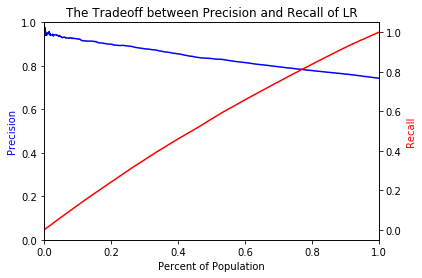

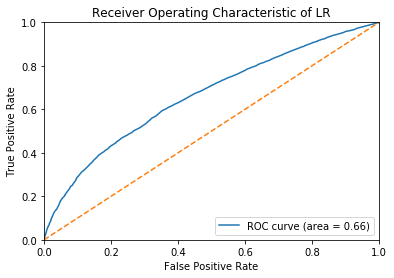

<Figure size 432x288 with 0 Axes>

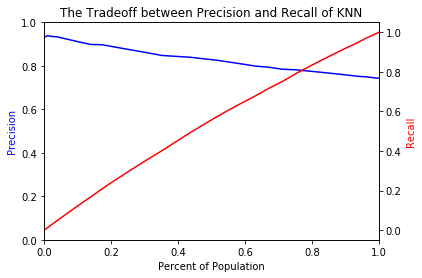

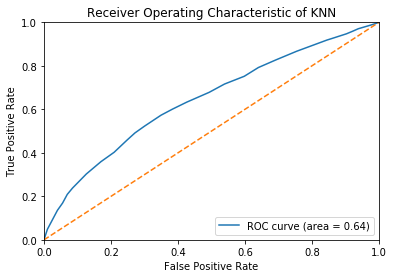

<Figure size 432x288 with 0 Axes>

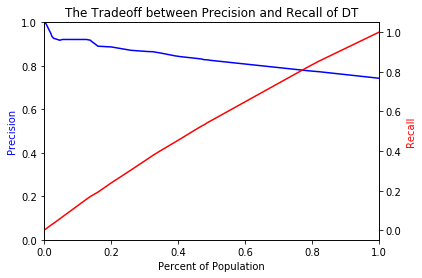

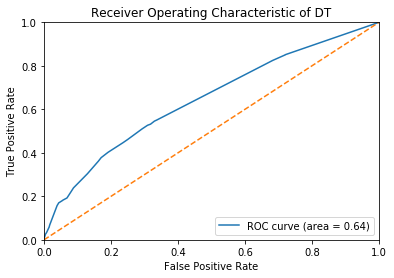

<Figure size 432x288 with 0 Axes>

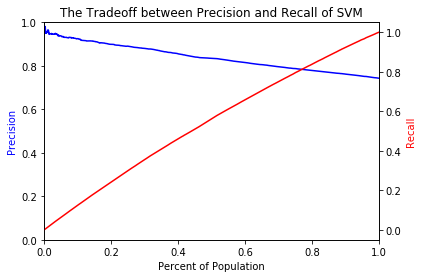

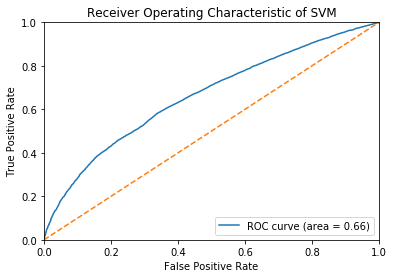

<Figure size 432x288 with 0 Axes>

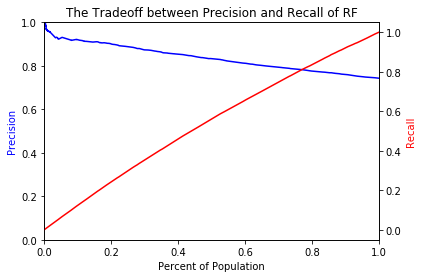

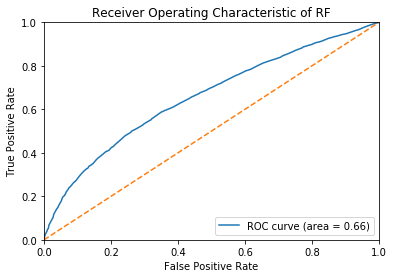

<Figure size 432x288 with 0 Axes>

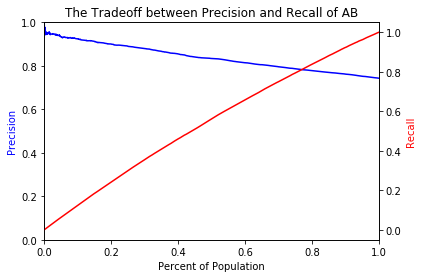

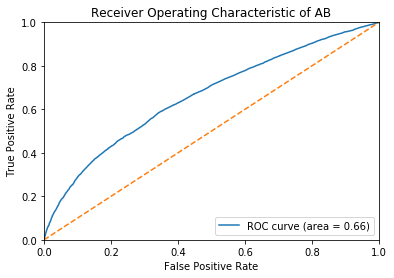

<Figure size 432x288 with 0 Axes>

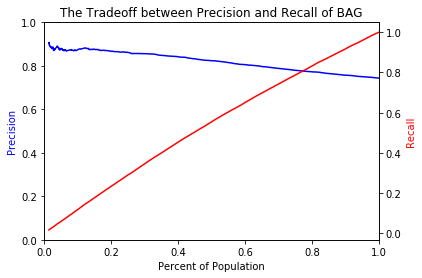

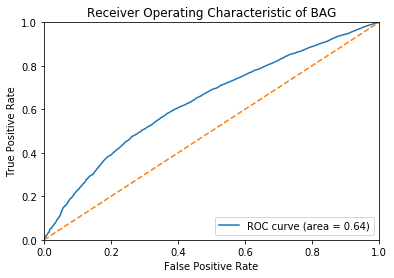

In [32]:
# Performances of different models using dataset 1
df1 = pl.evaluate_classifier(best_paras_1, new_train1, new_test1, train_target1, test_target1)

<Figure size 432x288 with 0 Axes>

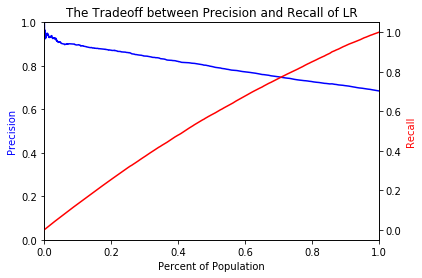

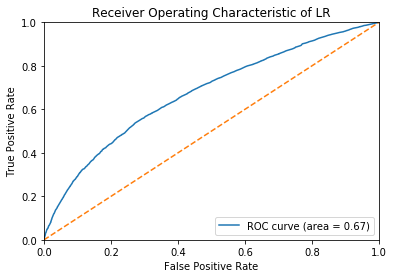

<Figure size 432x288 with 0 Axes>

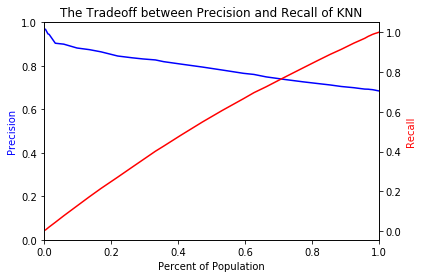

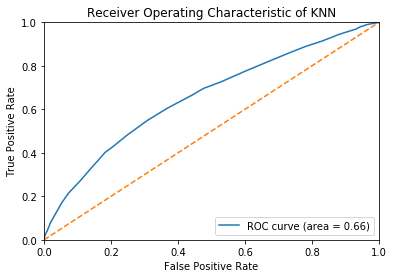

<Figure size 432x288 with 0 Axes>

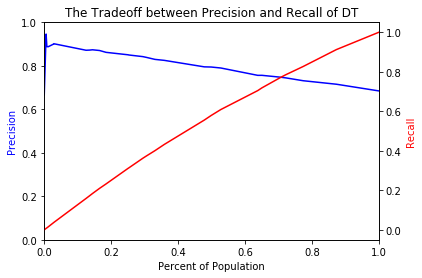

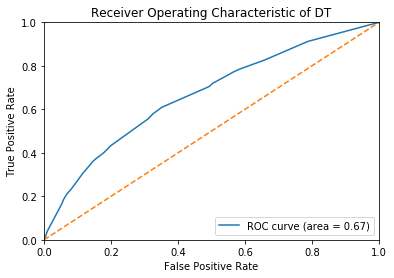

<Figure size 432x288 with 0 Axes>

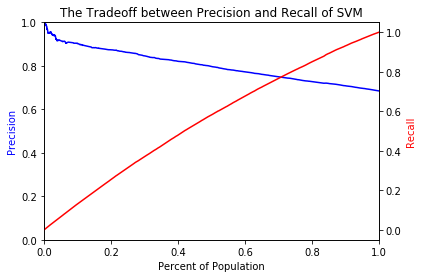

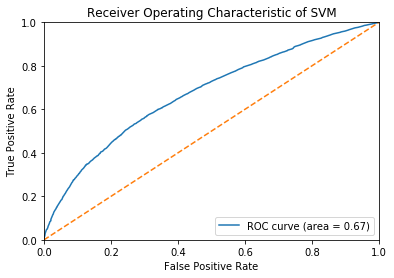

<Figure size 432x288 with 0 Axes>

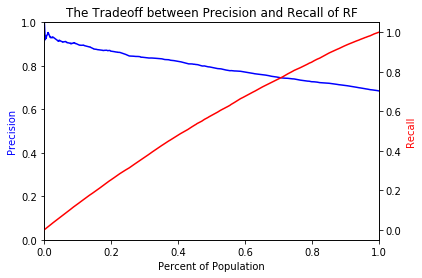

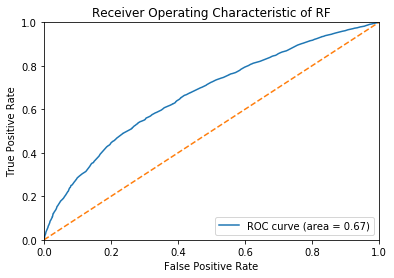

<Figure size 432x288 with 0 Axes>

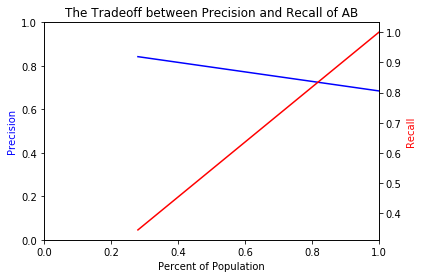

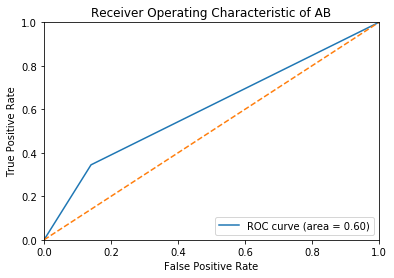

<Figure size 432x288 with 0 Axes>

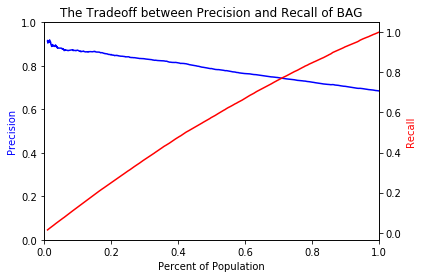

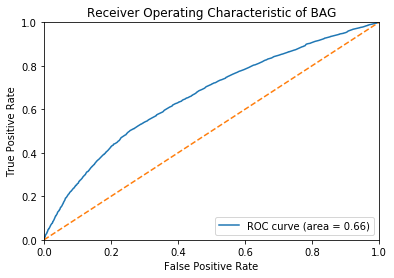

In [33]:
# Performances of different models using dataset 2
df2 = pl.evaluate_classifier(best_paras_2, new_train2, new_test2, train_target2, test_target2)

<Figure size 432x288 with 0 Axes>

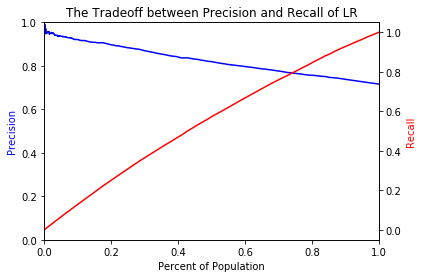

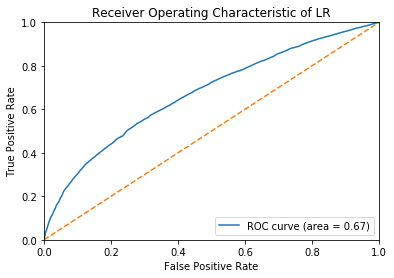

<Figure size 432x288 with 0 Axes>

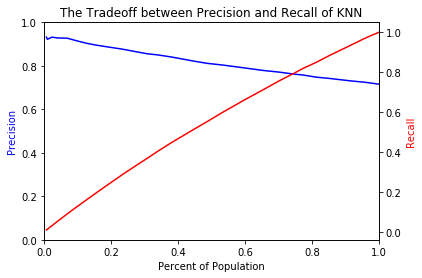

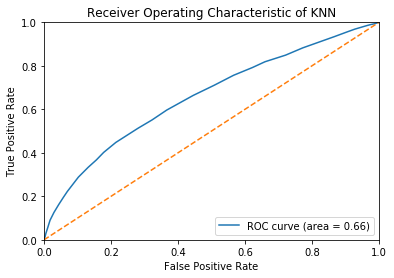

<Figure size 432x288 with 0 Axes>

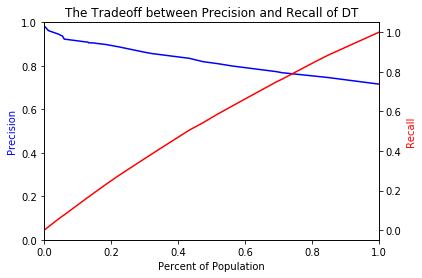

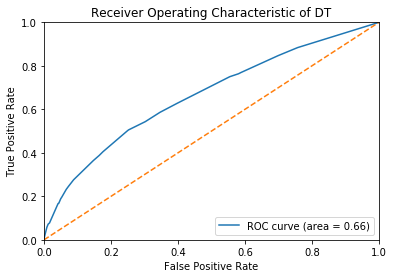

<Figure size 432x288 with 0 Axes>

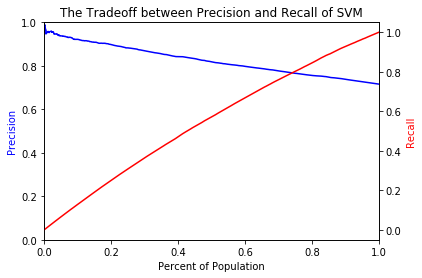

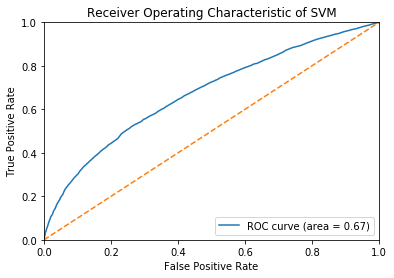

<Figure size 432x288 with 0 Axes>

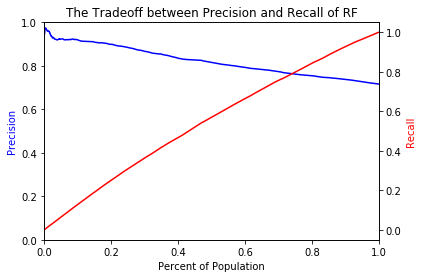

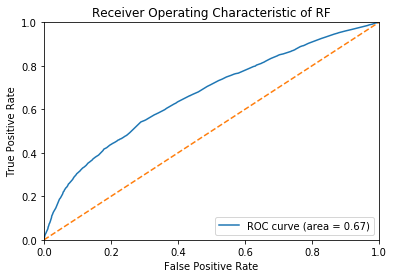

<Figure size 432x288 with 0 Axes>

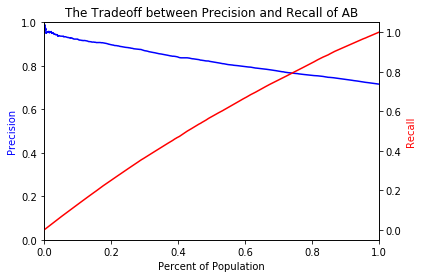

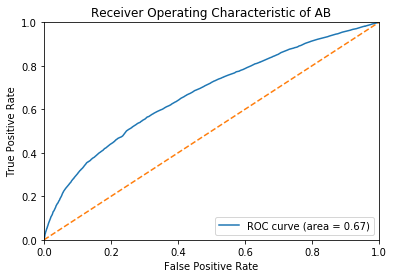

<Figure size 432x288 with 0 Axes>

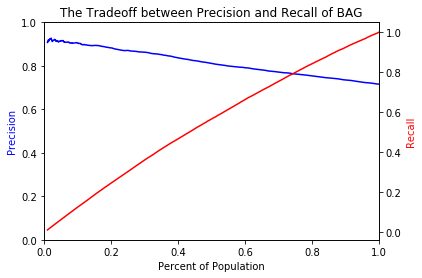

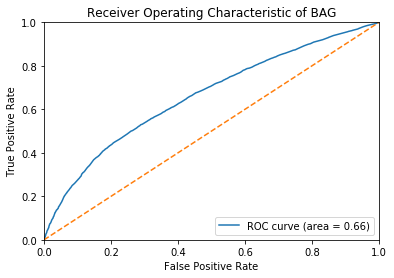

In [34]:
# Performances of different models using dataset 3
df3 = pl.evaluate_classifier(best_paras_3, new_train3, new_test3, train_target3, test_target3)

# Step 8: Find the Best Model for Different Dataset
In this step, based on the performances of models in last step 7, I find the best model for three dataset separated by three timestamps (2012-07-01, 2013-01-01, 2013-07-01).

In [35]:
df1

Index,Classifier,a_at_threshold_0.01,a_at_threshold_0.02,a_at_threshold_0.05,a_at_threshold_0.1,a_at_threshold_0.2,a_at_threshold_0.3,a_at_threshold_0.5,best_paras,p_at_threshold_0.01,...,r_at_threshold_0.3,r_at_threshold_0.5,roc_at_threshold_0.01,roc_at_threshold_0.02,roc_at_threshold_0.05,roc_at_threshold_0.1,roc_at_threshold_0.2,roc_at_threshold_0.3,roc_at_threshold_0.5,train_time
0,AB,0.743092,0.743092,0.743092,0.743092,0.743092,0.743092,0.728709,{'n_estimators': 100},0.743092,...,1,0.925382,0.5,0.5,0.5,0.5,0.5,0.5,0.542612,1.59905
1,BAG,0.743092,0.743092,0.743092,0.743092,0.743,0.741436,0.706382,"{'max_samples': 0.3, 'n_estimators': 20}",0.743092,...,0.99026,0.872885,0.5,0.5,0.500351,0.50082,0.502828,0.505993,0.548833,0.294835
2,DT,0.743092,0.743092,0.743092,0.743092,0.743092,0.743092,0.704389,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.743092,...,1,0.851217,0.5,0.5,0.5,0.5,0.5,0.5,0.565456,0.020673
3,KNN,0.743092,0.743092,0.743092,0.743092,0.743092,0.743061,0.707394,"{'metric': 'euclidean', 'n_neighbors': 50, 'we...",0.743092,...,0.999794,0.866983,0.5,0.5,0.5,0.5,0.5,0.500136,0.556388,1.0719
4,LR,0.743092,0.743092,0.743092,0.743092,0.743092,0.743092,0.731346,"{'C': 10, 'penalty': 'l1'}",0.743092,...,1,0.930995,0.5,0.5,0.5,0.5,0.5,0.5,0.542434,0.249489
5,RF,0.743092,0.743092,0.743092,0.743092,0.743092,0.743092,0.727911,"{'max_depth': 5, 'n_estimators': 5}",0.743092,...,1,0.932357,0.5,0.5,0.5,0.5,0.5,0.5,0.53446,0.0458851
6,SVM,0.732266,0.732051,0.727206,0.710492,0.670991,0.620327,0.490968,{'C': 0.1},0.759128,...,0.623731,0.365704,0.538523,0.538965,0.547459,0.565774,0.596289,0.617106,0.609496,0.205083


In [36]:
df2

Index,Classifier,a_at_threshold_0.01,a_at_threshold_0.02,a_at_threshold_0.05,a_at_threshold_0.1,a_at_threshold_0.2,a_at_threshold_0.3,a_at_threshold_0.5,best_paras,p_at_threshold_0.01,...,r_at_threshold_0.3,r_at_threshold_0.5,roc_at_threshold_0.01,roc_at_threshold_0.02,roc_at_threshold_0.05,roc_at_threshold_0.1,roc_at_threshold_0.2,roc_at_threshold_0.3,roc_at_threshold_0.5,train_time
0,AB,0.684713,0.684713,0.684713,0.684713,0.684713,0.684713,0.684713,{'n_estimators': 1},0.684713,...,1,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0235074
1,BAG,0.684713,0.684713,0.684713,0.684667,0.685133,0.685226,0.686623,"{'max_samples': 0.3, 'n_estimators': 20}",0.684713,...,0.997346,0.962167,0.5,0.5,0.5,0.499966,0.501143,0.502368,0.525194,0.614817
2,DT,0.684713,0.684713,0.684713,0.684713,0.684713,0.684713,0.684713,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.684713,...,1,0.999864,0.5,0.5,0.5,0.5,0.5,0.5,0.50008,0.0553122
3,KNN,0.684713,0.684713,0.684713,0.684713,0.684713,0.68476,0.684434,"{'metric': 'euclidean', 'n_neighbors': 50, 'we...",0.684713,...,0.999864,0.945223,0.5,0.5,0.5,0.5,0.5,0.500154,0.531648,7.65688
4,LR,0.684713,0.684713,0.684713,0.684713,0.684713,0.684713,0.688674,"{'C': 10, 'penalty': 'l1'}",0.684713,...,1,0.979654,0.5,0.5,0.5,0.5,0.5,0.5,0.5182,0.325556
5,RF,0.684713,0.684713,0.684713,0.684713,0.684713,0.684713,0.684713,"{'max_depth': 5, 'n_estimators': 5}",0.684713,...,1,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.082608
6,SVM,0.687509,0.687788,0.689885,0.689792,0.682896,0.658296,0.541397,{'C': 0.01},0.689663,...,0.735778,0.412221,0.51125,0.512491,0.523111,0.535322,0.570988,0.612902,0.617075,0.149855


In [37]:
df3

Index,Classifier,a_at_threshold_0.01,a_at_threshold_0.02,a_at_threshold_0.05,a_at_threshold_0.1,a_at_threshold_0.2,a_at_threshold_0.3,a_at_threshold_0.5,best_paras,p_at_threshold_0.01,...,r_at_threshold_0.3,r_at_threshold_0.5,roc_at_threshold_0.01,roc_at_threshold_0.02,roc_at_threshold_0.05,roc_at_threshold_0.1,roc_at_threshold_0.2,roc_at_threshold_0.3,roc_at_threshold_0.5,train_time
0,AB,0.715986,0.715986,0.715986,0.715986,0.715986,0.715986,0.713346,{'n_estimators': 100},0.715986,...,1,0.947527,0.5,0.5,0.5,0.5,0.5,0.5,0.535257,3.76304
1,BAG,0.715986,0.715986,0.715986,0.71594,0.715918,0.714848,0.709364,"{'max_samples': 0.3, 'n_estimators': 20}",0.715986,...,0.995392,0.931445,0.5,0.5,0.5,0.500017,0.500967,0.501502,0.540476,0.868801
2,DT,0.715986,0.715986,0.715986,0.715986,0.715986,0.715986,0.71594,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.715986,...,1,0.999873,0.5,0.5,0.5,0.5,0.5,0.5,0.500017,0.0726209
3,KNN,0.715986,0.715986,0.715986,0.715986,0.715986,0.715986,0.706679,"{'metric': 'euclidean', 'n_neighbors': 50, 'we...",0.715986,...,1,0.933988,0.5,0.5,0.5,0.5,0.5,0.5,0.533816,20.8394
4,LR,0.715986,0.715986,0.715986,0.715986,0.715986,0.715986,0.714757,"{'C': 10, 'penalty': 'l1'}",0.715986,...,1,0.953916,0.5,0.5,0.5,0.5,0.5,0.5,0.532883,0.368544
5,RF,0.715986,0.715986,0.715986,0.715986,0.715986,0.715986,0.715986,"{'max_depth': 5, 'n_estimators': 5}",0.715986,...,1,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.117337
6,SVM,0.71503,0.714825,0.713801,0.709819,0.68472,0.636045,0.514188,{'C': 0.01},0.726032,...,0.655098,0.380975,0.523551,0.530223,0.537774,0.558559,0.5907,0.621556,0.615494,0.204235


In [38]:
pl.best_model(df2, 'a_at_threshold_0.5').loc[:, ['Classifier', 'a_at_threshold_0.5']]

Index,Classifier,a_at_threshold_0.5
4,LR,0.688674
1,BAG,0.686623
0,AB,0.684713
2,DT,0.684713
5,RF,0.684713
3,KNN,0.684434
6,SVM,0.541397


In [39]:
pl.best_model(df2, 'p_at_threshold_0.5').loc[:, ['Classifier', 'p_at_threshold_0.5']]

Index,Classifier,p_at_threshold_0.5
6,SVM,0.834091
3,KNN,0.699481
1,BAG,0.696209
4,LR,0.69283
2,DT,0.684748
0,AB,0.684713
5,RF,0.684713


In [40]:
pl.best_model(df2, 'r_at_threshold_0.5').loc[:, ['Classifier', 'r_at_threshold_0.5']]

Index,Classifier,r_at_threshold_0.5
0,AB,1
5,RF,1
2,DT,0.999864
4,LR,0.979654
1,BAG,0.962167
3,KNN,0.945223
6,SVM,0.412221


In [41]:
pl.best_model(df2, 'roc_at_threshold_0.5').loc[:, ['Classifier', 'roc_at_threshold_0.5']]

Index,Classifier,roc_at_threshold_0.5
6,SVM,0.617075
3,KNN,0.531648
1,BAG,0.525194
4,LR,0.5182
2,DT,0.50008
0,AB,0.5
5,RF,0.5


In [42]:
pl.best_model(df2, 'train_time').loc[:, ['Classifier', 'train_time']]

Index,Classifier,train_time
3,KNN,7.65688
1,BAG,0.614817
4,LR,0.325556
6,SVM,0.149855
5,RF,0.082608
2,DT,0.0553122
0,AB,0.0235074


In [43]:
pl.best_model(df1, 'p_at_threshold_0.05').loc[:, ['Classifier', 'p_at_threshold_0.05']]

Index,Classifier,p_at_threshold_0.05
6,SVM,0.763388
1,BAG,0.743226
0,AB,0.743092
2,DT,0.743092
3,KNN,0.743092
4,LR,0.743092
5,RF,0.743092


In [44]:
pl.best_model(df1, 'r_at_threshold_0.05').loc[:, ['Classifier', 'r_at_threshold_0.05']]

Index,Classifier,r_at_threshold_0.05
0,AB,1
2,DT,1
3,KNN,1
4,LR,1
5,RF,1
1,BAG,0.999629
6,SVM,0.917169


In [45]:
pl.best_model(df1, 'roc_at_threshold_0.05').loc[:, ['Classifier', 'roc_at_threshold_0.05']]

Index,Classifier,roc_at_threshold_0.05
6,SVM,0.547459
1,BAG,0.500351
0,AB,0.5
2,DT,0.5
3,KNN,0.5
4,LR,0.5
5,RF,0.5


In [46]:
pl.best_model(df2, 'p_at_threshold_0.05').loc[:, ['Classifier', 'p_at_threshold_0.05']]

Index,Classifier,p_at_threshold_0.05
6,SVM,0.695108
0,AB,0.684713
1,BAG,0.684713
2,DT,0.684713
3,KNN,0.684713
4,LR,0.684713
5,RF,0.684713


In [47]:
pl.best_model(df2, 'r_at_threshold_0.05').loc[:, ['Classifier', 'r_at_threshold_0.05']]

Index,Classifier,r_at_threshold_0.05
0,AB,1
1,BAG,1
2,DT,1
3,KNN,1
4,LR,1
5,RF,1
6,SVM,0.974551


In [48]:
pl.best_model(df2, 'roc_at_threshold_0.05').loc[:, ['Classifier', 'roc_at_threshold_0.05']]

Index,Classifier,roc_at_threshold_0.05
6,SVM,0.523111
0,AB,0.5
1,BAG,0.5
2,DT,0.5
3,KNN,0.5
4,LR,0.5
5,RF,0.5


In [49]:
pl.best_model(df3, 'p_at_threshold_0.05').loc[:, ['Classifier', 'p_at_threshold_0.05']]

Index,Classifier,p_at_threshold_0.05
6,SVM,0.732616
0,AB,0.715986
1,BAG,0.715986
2,DT,0.715986
3,KNN,0.715986
4,LR,0.715986
5,RF,0.715986


In [50]:
pl.best_model(df3, 'r_at_threshold_0.05').loc[:, ['Classifier', 'r_at_threshold_0.05']]

Index,Classifier,r_at_threshold_0.05
0,AB,1
1,BAG,1
2,DT,1
3,KNN,1
4,LR,1
5,RF,1
6,SVM,0.945271


In [51]:
pl.best_model(df3, 'roc_at_threshold_0.05').loc[:, ['Classifier', 'roc_at_threshold_0.05']]

Index,Classifier,roc_at_threshold_0.05
6,SVM,0.537774
0,AB,0.5
1,BAG,0.5
2,DT,0.5
3,KNN,0.5
4,LR,0.5
5,RF,0.5


In [52]:
pl.best_model(df3, 'train_time').loc[:, ['Classifier', 'train_time']]

Index,Classifier,train_time
3,KNN,20.8394
0,AB,3.76304
1,BAG,0.868801
4,LR,0.368544
6,SVM,0.204235
5,RF,0.117337
2,DT,0.0726209


The overall performances of different models across different dataset is constant. To evaluate which model does better on which metrics, we select the dataset 2, that is, we trained models with the data from 2012-01-01 to 2013-01-01, and use the data from 2013-01-01 to 2013-07-01 to validate and evaluate the models we trained. Meanwhile, we set the threshold of 50%.
At the threshold of 50%, Support Vector Machine(SVM) performs best in the metrics of precision score(0.853) and ROC-AUC score(0.616), and the models of the highest recall score(1.000) are AdaBoosting(AB) and Random Forest(RF). 
Although SVM performs best in both precision score and ROC-AUC score, it has the lowest recall score (only 0.395). AB and RF have the same score in the three criteria (highest score in recall score). Despite the fact that the precision scores(0.705) and ROC-AUC scores(0.5) of AB and RF are smaller than SVM, but their performances are not as unstable as SVM. In addition, AB costs the least training time (0.037). Thus, basd on the comprehensive analysis, AdaBoosting performs best overall at the threshold of 50%.


To find the best model used to identify 5% of posted projects to intervene, we set all criteria at the threshold of 5%. Through the rank of different dataset separated by timestamps (2012-07-01, 2013-01-01, 2013-07-01), we can find the rank is constant across three dataset. The model of the highest precision score and the highest ROC-AUC score is Support Vector Machine(SVM). Although SVM dominates both precision score and ROC-AUC score, it has the lowest recall score. On the other hand, other models performance the same in all three criteria at the threshold of 5%. In addition, if we evaluate the models by taining time, we can find that Decision Tree(DT) perfroms the best. Thus, DT is the best model at the threshold of 5%.

